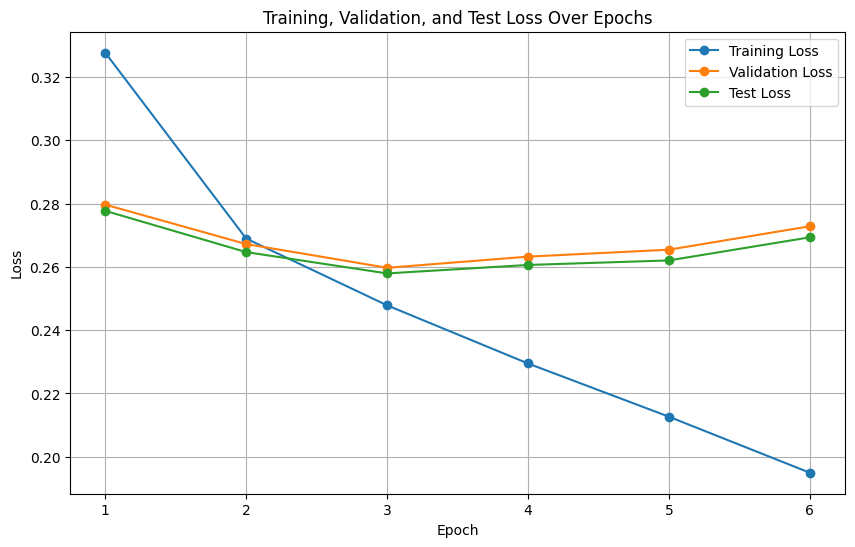

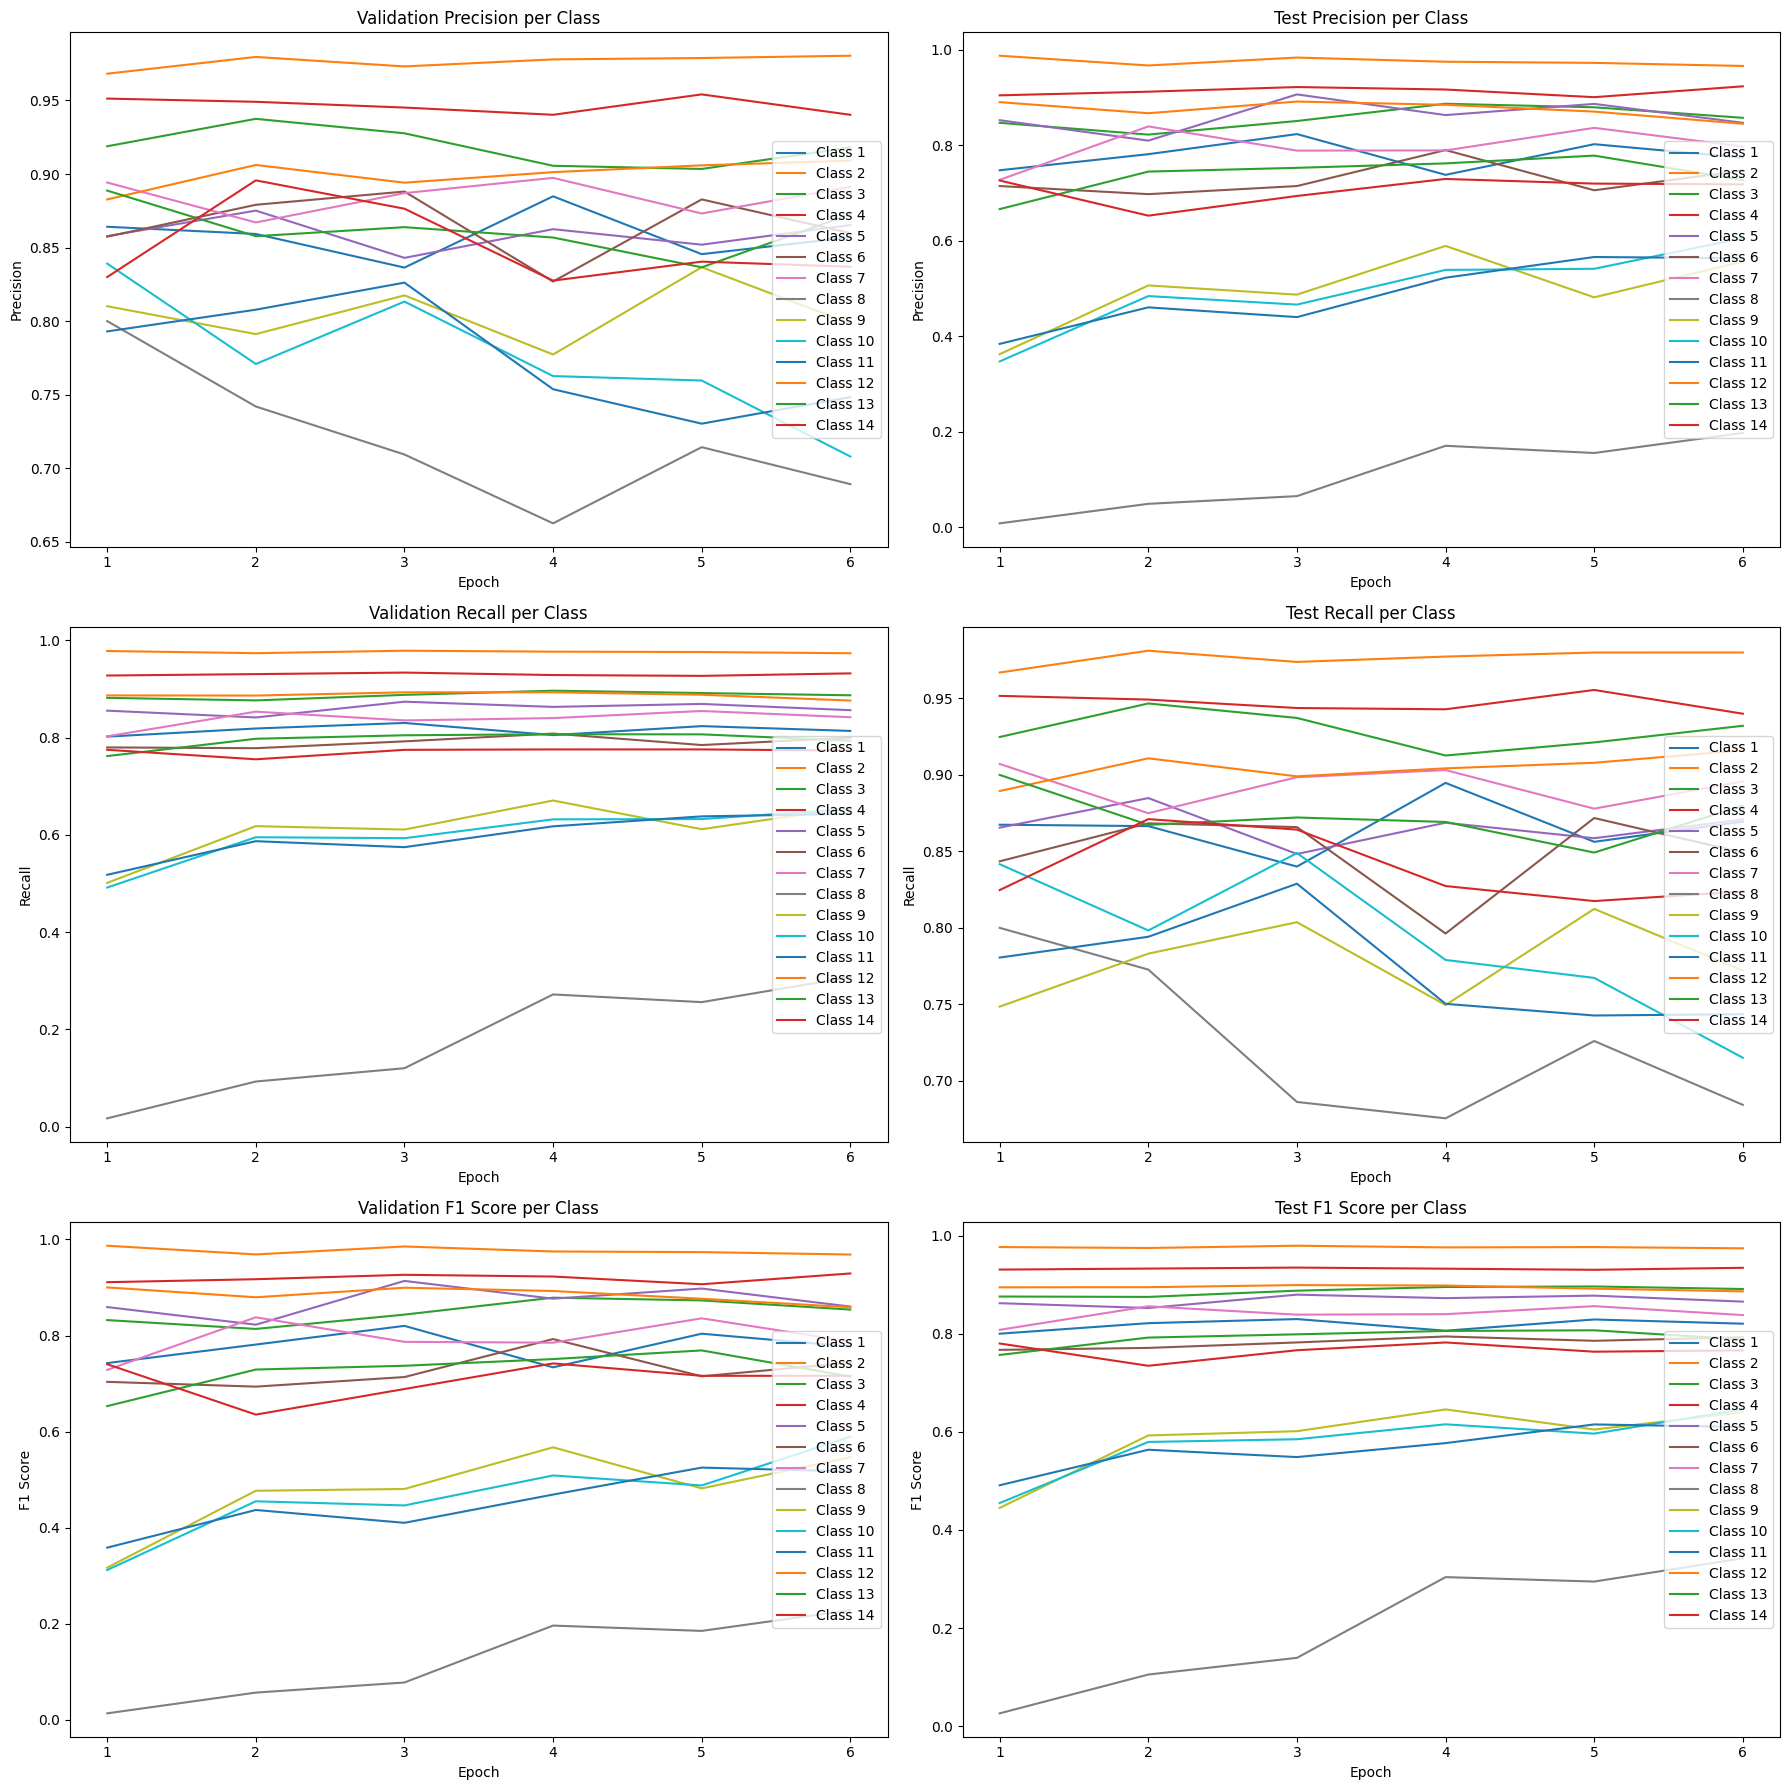

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

def robust_convert_to_array(str_list):

    try:
        # Remove extra spaces and handle consecutive commas (caused by original data errors)
        formatted_str = ','.join([x.strip() for x in str_list.split() if x != ''])
        # Replace instances of multiple consecutive commas (caused by original data errors)
        formatted_str = formatted_str.replace(',,', ',').replace('[,', '[').replace(',]', ']')
        return np.array(ast.literal_eval(formatted_str))
    except Exception as e:
        # Return an empty array in case of parsing errors
        print(f"Error parsing: {e}")
        return np.array([])

# Load the data
data_path = 'metrics.csv' 
data = pd.read_csv(data_path)


metrics = ['val_precision', 'val_recall', 'val_f1', 'test_precision', 'test_recall', 'test_f1']
for metric in metrics:
    data[metric] = data[metric].apply(robust_convert_to_array)

# Plotting Train, Validation, and Test Losses
epochs = range(1, len(data['train_loss']) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, data['train_loss'], label='Training Loss', marker='o')
plt.plot(epochs, data['val_loss'], label='Validation Loss', marker='o')
plt.plot(epochs, data['test_loss'], label='Test Loss', marker='o')
plt.title('Training, Validation, and Test Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Number of classes 
num_classes = len(data['val_precision'].iloc[0])

# Setting up the plots for metrics
fig, axs = plt.subplots(3, 2, figsize=(18, 18))  

# Labels for plots
metrics_labels = ['Precision', 'Recall', 'F1 Score']
datasets = ['Validation', 'Test']
metrics_data = ['val_precision', 'val_recall', 'val_f1', 'test_precision', 'test_recall', 'test_f1']

# Generate plots for each metric and dataset
for i in range(3):
    for j in range(2):
        metric_index = i * 2 + j
        for k in range(num_classes):
            axs[i, j].plot(epochs, data[metrics_data[metric_index]].apply(lambda x: x[k]), label=f'Class {k+1}')
        axs[i, j].set_title(f'{datasets[j]} {metrics_labels[i]} per Class')
        axs[i, j].set_xlabel('Epoch')
        axs[i, j].set_ylabel(metrics_labels[i])
        axs[i, j].legend(loc='right')

plt.tight_layout()
plt.show()
